<a href="https://colab.research.google.com/github/cbadenes/curso-pln/blob/main/notebooks/05_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal Multicapa (MLP) para Clasificación de Texto

## 1) Importamos las bibliotecas necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 2) Cargamos y preparamos los datos

Cargamos el dataset de IMDb (limitamos a 5000 palabras más frecuentes)

In [2]:
NUM_WORDS = 5000
(X_train_raw, y_train), (X_test_raw, y_test) = imdb.load_data(num_words=NUM_WORDS)

# Convertimos los índices de palabras de nuevo a texto
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

# Convertimos algunas reseñas para visualización
X_train_text = [decode_review(x) for x in X_train_raw[:1000]]
X_test_text = [decode_review(x) for x in X_test_raw[:200]]
y_train = y_train[:1000]
y_test = y_test[:200]

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 3) Visualizamos algunos ejemplos

In [3]:
print("\nEjemplos de reseñas:")
for i in range(2):
    print(f"\nReseña {i+1} (Sentimiento: {'Positivo' if y_train[i] == 1 else 'Negativo'}):")
    print(X_train_text[i][:200] + "...")



Ejemplos de reseñas:

Reseña 1 (Sentimiento: Positivo):
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the sa...

Reseña 2 (Sentimiento: Negativo):
? big hair big ? bad music and a giant safety ? these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever ...


## 4) Preparamos el texto

In [4]:
# Convertimos el texto a características numéricas usando TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_features = vectorizer.fit_transform(X_train_text)
X_test_features = vectorizer.transform(X_test_text)

# Normalizamos las características
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)


## 5) Creamos y entrenamos el modelo basado en una red de neuronas

In [5]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  # Una capa oculta con 100 neuronas
    activation='relu',          # Función de activación ReLU
    max_iter=10,               # Número de épocas
    random_state=42,
    verbose=True
)

# Entrenamos el modelo
mlp.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.73916563
Iteration 2, loss = 0.39678776
Iteration 3, loss = 0.24056721
Iteration 4, loss = 0.15378255
Iteration 5, loss = 0.10332233
Iteration 6, loss = 0.07130423
Iteration 7, loss = 0.05112458
Iteration 8, loss = 0.03799575
Iteration 9, loss = 0.02949677
Iteration 10, loss = 0.02367845


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=10, random_state=42, verbose=True)

## 6) Analizamos su rendimiento

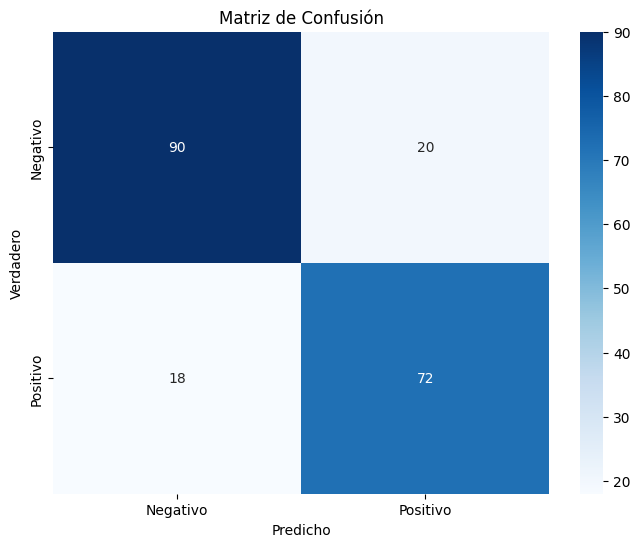


Informe de Clasificación:
              precision    recall  f1-score   support

    Negativo       0.83      0.82      0.83       110
    Positivo       0.78      0.80      0.79        90

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [6]:
# Realizamos predicciones
y_pred = mlp.predict(X_test_scaled)

# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

# Mostramos métricas de evaluación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['Negativo', 'Positivo']))

## 7) Visualizamos algunas predicciones

In [7]:
print("\nEjemplos de predicciones:")
indices = np.random.randint(0, len(X_test_text), 3)
for idx in indices:
    print(f"\nReseña: {X_test_text[idx][:200]}...")
    print(f"Sentimiento real: {'Positivo' if y_test[idx] == 1 else 'Negativo'}")
    print(f"Predicción: {'Positivo' if y_pred[idx] == 1 else 'Negativo'}")



Ejemplos de predicciones:

Reseña: ? this documentary was boring and quite stupid br br i mean the documentary maker obviously does not even know what how ? ? works it is a theory and the name is just plain dumb reading a college ? tex...
Sentimiento real: Negativo
Predicción: Negativo

Reseña: ? tommy lee jones was the best and no one can play f call better than he not only was he the first and best he was the only person that could portray his ? and confusion it was a bad let down and i'm ...
Sentimiento real: Negativo
Predicción: Negativo

Reseña: ? ok so in any ? e ? road ? cartoons we know that is going to set up all sorts of ? for ? but always himself in various ways that certainly happens in ? ? predictable i guess that it is but when you t...
Sentimiento real: Positivo
Predicción: Negativo


## 8) Visualizamos la curva de pérdida de error

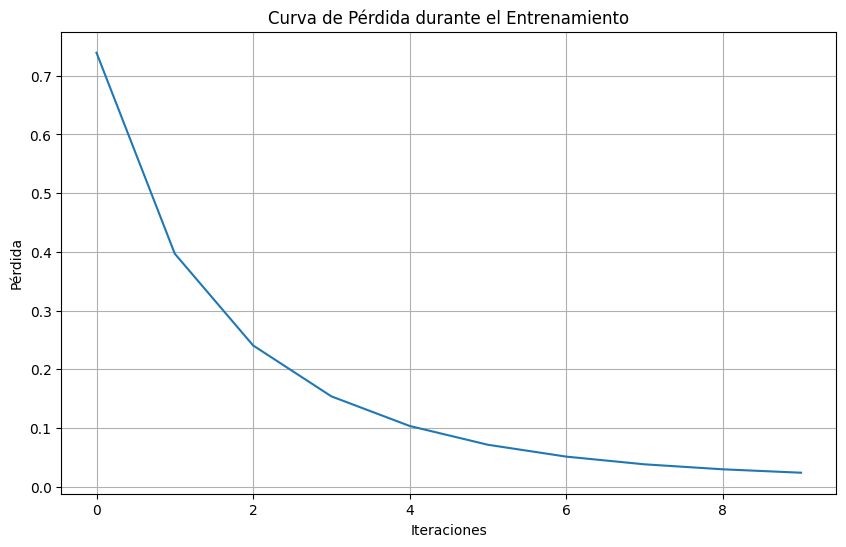

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()

## 9) Análisis de palabras importantes

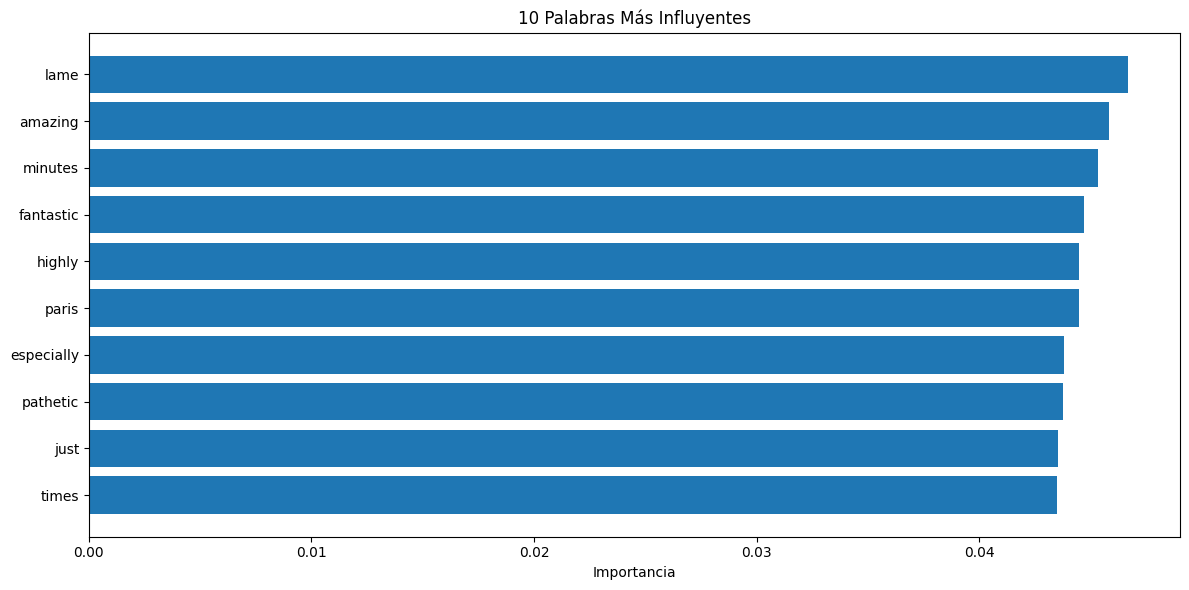

In [9]:
# Obtenemos los coeficientes más importantes del modelo
feature_names = vectorizer.get_feature_names_out()
plt.figure(figsize=(12, 6))

# Visualizamos las palabras más importantes positivas y negativas
importances = np.abs(mlp.coefs_[0]).mean(axis=1)
sorted_idx = np.argsort(importances)
pos = np.arange(len(sorted_idx[-10:]))

plt.barh(pos, importances[sorted_idx[-10:]])
plt.yticks(pos, feature_names[sorted_idx[-10:]])
plt.title('10 Palabras Más Influyentes')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()